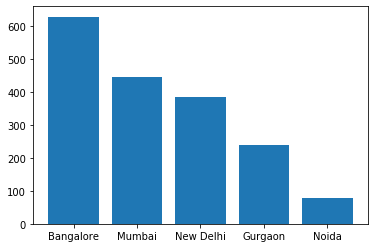

In [60]:
#Question 1
#Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location
#where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations 
#Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon,
#Noida and New Delhi.Find the location where the most number of funding is done. That means, find the location where startups 
#has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" 
#as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is 
#given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the 
#startup if any one of the city lies in given locations.

import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Dataset/startup_funding.csv')
df.dropna(subset=['CityLocation'],inplace=True)
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'].replace('bangalore','Bangalore',inplace=True)
df=df[(df['CityLocation']=='New Delhi')|(df['CityLocation']=='Gurgaon')|(df['CityLocation']=='Noida')|(df['CityLocation']=='Bangalore') |(df['CityLocation']=='Mumbai')]
df=df['CityLocation'].value_counts()
city = list(df.index.values)
times = list(df.values)
plt.bar(city,times)
plt.show()

In [56]:
#Question 2
#Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter 
#in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase
#the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who 
#have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might
#have invested. So consider each investor for that startup. Ignore undisclosed investors.


import pandas as pd

df = pd.read_csv('Dataset/startup_funding.csv')
df = df[['InvestorsName']]
df.dropna(subset=['InvestorsName'],inplace=True)
s_list=list(df['InvestorsName'])
d={}
for i in s_list:
    key = i.split(',')
    for j in range(len(key)):
        d[key[j].strip()]=d.get(key[j].strip(),0)+1
sort = sorted(d.items(),key = lambda x:x[1], reverse=True)
for i in range(5):
    print(sort[i][0]," ",sort[i][1])
    

Sequoia Capital   64
Accel Partners   53
Kalaari Capital   44
SAIF Partners   41
Indian Angel Network   40


In [57]:
#Question 3
#After re-analysing the dataset you found out that some investors have invested in the same startup at different number of 
#funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have 
#invested in different number of startups. This list will be more helpful than your previous list in finding the investment
#for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means,
#if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names.
#Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

import pandas as pd

data = pd.read_csv("Dataset/startup_funding.csv")
df=data.copy()
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investors','',inplace=True)
df['StartupName'].fillna('Unknown',inplace=True)
df['InvestorsName'].fillna('Unknown',inplace=True)
ds=df['StartupName']
di=df['InvestorsName']
d={}
i=0
for ele in di:
    p=str(ele)
    q=p.split(",")
    for e in q:
        e=e.strip()
        if e in d:
            d[e]+=[ds[i]]
        else:
            d[e]=[ds[i]]
    i=i+1
for ele in d:
    d[ele]=len(set(d[ele]))
investor = sorted(d.items(),key = lambda x:x[1], reverse=True)
for i in range(1,6):
    print(investor[i][0])

Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


In [59]:
# Question-4
# Find the top 5 investors who have invested in a different number of startups and their 
#investment type is Crowdfunding or Seed Funding

import pandas as pd
import numpy as np
data = pd.read_csv('Dataset/startup_funding.csv')
df = data.copy()
df = df[['StartupName','InvestorsName','InvestmentType']]
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investors','',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding', inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity', inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding', inplace=True)
df = df[(df['InvestmentType']=='Seed Funding') | (df['InvestmentType']=='Crowd Funding')]
df.dropna(subset=['InvestmentType'],inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)
df.dropna(subset=['StartupName'],inplace=True)
ds=np.array(df['StartupName'])
di=df['InvestorsName']
d={}
i=0
for nam in di:
    p=str(nam)
    q=p.split(",")
    for e in q:
        e=e.strip()
        if e in d:
            d[e]=[ds[i]]
        else:
            d[e]=[ds[i]]
    i=i+1
for ele in d:
    d[ele]=len(set(d[ele]))
investor = sorted(d.items(),key = lambda x:x[1], reverse=True)
for i in range(5):
    print(investor[i][0])

Kashyap Deorah
Anand Sankeshwar
Deepak Jain
Sadashiva NT
Arjun Mehta


In [58]:
#Question-5
# Question-4
# Find the top 5 investors who have invested in a different number of startups and their 
#investment type is Crowdfunding or Seed Funding

import pandas as pd
import numpy as np
data = pd.read_csv('Dataset/startup_funding.csv')
df = data.copy()
df = df[['StartupName','InvestorsName','InvestmentType']]
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed investor','Undisclosed Investors',inplace=True)
df['InvestorsName'].replace('Undisclosed Investors','',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding', inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity', inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding', inplace=True)
df = df[df['InvestmentType']=='Private Equity']
df.dropna(subset=['InvestmentType'],inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)
df.dropna(subset=['StartupName'],inplace=True)
ds=np.array(df['StartupName'])
di=df['InvestorsName']
d={}
i=0
for nam in di:
    p=str(nam)
    q=p.split(",")
    for e in q:
        e=e.strip()
        if e in d:
            d[e]=[ds[i]]
        else:
            d[e]=[ds[i]]
    i=i+1
for ele in d:
    d[ele]=len(set(d[ele]))
investor = sorted(d.items(),key = lambda x:x[1], reverse=True)
for i in range(5):
    print(investor[i][0])

Kae Capital
Triton Investment Advisors
Infuse Ventures
JLL
Asset Management (Asia) Ltd
